<a href="https://colab.research.google.com/github/AjMing/Pattern-EGCI463/blob/main/Week3/Demo_Bayes_cont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.stats as sc
sc.norm(160,1.63)

In [ ]:
import numpy as np
x=np.linspace(120,200)

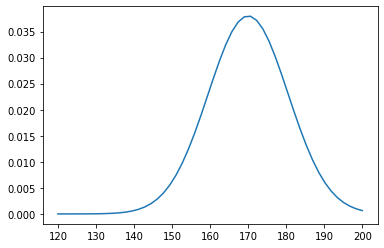

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x,sc.norm(170,10.5).pdf(x))


In [ ]:
#Set directory
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)
path = '/content/drive/My Drive/data'

Mounted at /content/drive/


In [ ]:
#Question1 What is a probability of P(W|Height=177)=?

In [ ]:
import pandas as pd
df =pd.read_csv(path + '/Weight_Height_M_W.csv')
print(df)

       Height   Weight gender
0    159.7415  57.2608      W
1    157.2365  53.1664      W
2    158.8578  49.5106      W
3    157.4017  54.1508      W
4    156.2003  52.2173      W
..        ...      ...    ...
195  172.1863  63.6287      M
196  168.9630  55.1719      M
197  172.8701  53.6238      M
198  171.1873  62.8852      M
199  168.6423  75.0807      M

[200 rows x 3 columns]


In [ ]:
#import io
#from google.colab import files
#uploaded = files.upload()
#df =pd.read_csv(io.BytesIO(uploaded['Weight_Height_M_W.csv']),header=None)

In [ ]:
df.groupby(['gender']).mean()
df.groupby(['gender']).std()

,Height,Weight
gender,,
M,3.115980,7.562830
W,3.788572,5.785478


In [ ]:
df.loc[df['gender']=='W','Weight'].mean()


53.18162799999998

In [ ]:
#P(W|Height=177) =P(Height=177|W)*P(W)/(P(Height=177|W)*P(W)+P(Height=177|M)*P(M))

#P(Height=177|W)
PH_W=sc.norm(160.13,3.788).pdf(177)
#P(Height=177|M)
PH_M=sc.norm(168.25,3.116).pdf(177)

print(PH_W*0.5/(PH_W*0.5+PH_M*0.5))
print(PH_M*0.5/(PH_W*0.5+PH_M*0.5))

0.002087686276526924
0.9979123137234731


In [ ]:
np.mean(df[df['gender']=='W']['Height'])

160.13323300000005

In [ ]:
#Question2 What is a probability of P(W|Height=177, Weight=60)=?

In [ ]:
df['gender_code']=1*(df['gender']=='W')

In [ ]:
print(df)

       Height   Weight gender  gender_code
0    159.7415  57.2608      W            1
1    157.2365  53.1664      W            1
2    158.8578  49.5106      W            1
3    157.4017  54.1508      W            1
4    156.2003  52.2173      W            1
..        ...      ...    ...          ...
195  172.1863  63.6287      M            0
196  168.9630  55.1719      M            0
197  172.8701  53.6238      M            0
198  171.1873  62.8852      M            0
199  168.6423  75.0807      M            0

[200 rows x 4 columns]


In [ ]:
import random
#random.seed(10)
train=random.sample(range(200), 160)
df['train']=0
df.loc[train,'train']=1


In [ ]:
data_train=df[df['train']==1]
data_test=df[df['train']==0]


In [ ]:
print(data_train)

       Height   Weight gender  gender_code  train
0    159.7415  57.2608      W            1      1
1    157.2365  53.1664      W            1      1
2    158.8578  49.5106      W            1      1
3    157.4017  54.1508      W            1      1
4    156.2003  52.2173      W            1      1
..        ...      ...    ...          ...    ...
195  172.1863  63.6287      M            0      1
196  168.9630  55.1719      M            0      1
197  172.8701  53.6238      M            0      1
198  171.1873  62.8852      M            0      1
199  168.6423  75.0807      M            0      1

[160 rows x 5 columns]


In [ ]:
print(data_test)

       Height   Weight gender  gender_code  train
8    158.5835  68.3823      W            1      0
18   161.8555  53.6312      W            1      0
19   157.6475  60.9373      W            1      0
25   161.1941  63.4918      W            1      0
29   153.0009  56.2988      W            1      0
45   155.0523  50.6452      W            1      0
56   154.7271  54.3823      W            1      0
58   159.6568  50.6110      W            1      0
61   156.9264  55.4104      W            1      0
67   155.9105  46.7214      W            1      0
69   160.8251  47.2935      W            1      0
73   164.4139  50.7061      W            1      0
74   165.7449  51.0843      W            1      0
80   165.6361  55.5881      W            1      0
87   165.4567  47.6790      W            1      0
89   165.4431  48.0461      W            1      0
90   164.8652  48.2169      W            1      0
95   166.6484  52.3499      W            1      0
104  169.1859  67.9315      M            0      0


In [ ]:
mean_WM=data_train.loc[data_train['gender']=='M','Weight'].mean()
sd_WM =data_train.loc[data_train['gender']=='M','Weight'].std()

In [ ]:
mean_WW=data_train.loc[data_train['gender']=='W','Weight'].mean()
sd_WW =data_train.loc[data_train['gender']=='W','Weight'].std()

In [ ]:
mean_HM=data_train.loc[data_train['gender']=='M','Height'].mean()
sd_HM =data_train.loc[data_train['gender']=='M','Height'].std()

In [ ]:
mean_HW=data_train.loc[data_train['gender']=='W','Height'].mean()
sd_HW =data_train.loc[data_train['gender']=='W','Height'].std()

In [ ]:
PW=sc.norm(mean_WW,sd_WW).pdf(data_test['Weight'])*sc.norm(mean_HW,sd_HW).pdf(data_test['Height'])*0.5


In [ ]:
PM=sc.norm(mean_WM,sd_WM).pdf(data_test['Weight'])*sc.norm(mean_HM,sd_HM).pdf(data_test['Height'])*0.5


In [ ]:
prob_w=PW/(PW+PM)

In [ ]:
prob_m=PM/(PW+PM)

In [ ]:
np.set_printoptions(precision=3,suppress=True)
np.array([np.round(prob_w,2) ,np.round(prob_m,2) ,data_test['gender']]).T

array([[0.92, 0.08, 'W'],
       [0.94, 0.06, 'W'],
       [1.0, 0.0, 'W'],
       [0.8, 0.2, 'W'],
       [1.0, 0.0, 'W'],
       [1.0, 0.0, 'W'],
       [1.0, 0.0, 'W'],
       [0.99, 0.01, 'W'],
       [1.0, 0.0, 'W'],
       [1.0, 0.0, 'W'],
       [0.99, 0.01, 'W'],
       [0.74, 0.26, 'W'],
       [0.5, 0.5, 'W'],
       [0.36, 0.64, 'W'],
       [0.63, 0.37, 'W'],
       [0.62, 0.38, 'W'],
       [0.72, 0.28, 'W'],
       [0.31, 0.69, 'W'],
       [0.0, 1.0, 'M'],
       [0.03, 0.97, 'M'],
       [0.32, 0.68, 'M'],
       [0.01, 0.99, 'M'],
       [0.0, 1.0, 'M'],
       [0.04, 0.96, 'M'],
       [0.86, 0.14, 'M'],
       [0.03, 0.97, 'M'],
       [0.0, 1.0, 'M'],
       [0.16, 0.84, 'M'],
       [0.33, 0.67, 'M'],
       [0.5, 0.5, 'M'],
       [0.96, 0.04, 'M'],
       [0.0, 1.0, 'M'],
       [0.0, 1.0, 'M'],
       [0.05, 0.95, 'M'],
       [0.02, 0.98, 'M'],
       [0.24, 0.76, 'M'],
       [0.05, 0.95, 'M'],
       [0.0, 1.0, 'M'],
       [0.41, 0.59, 'M'],
       [0.03, 0.